<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [2]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [4]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [5]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.


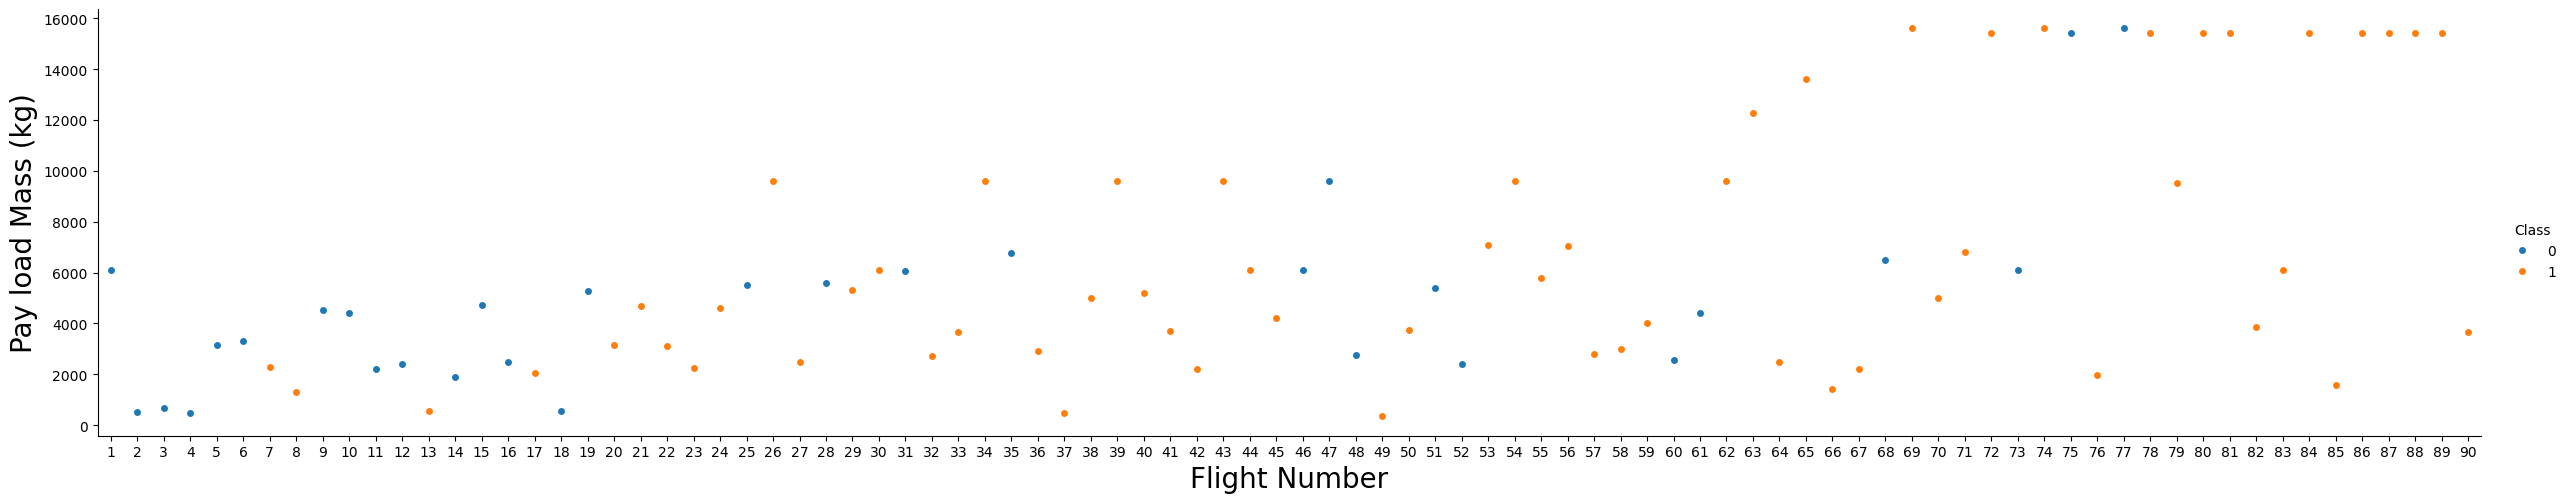

In [6]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


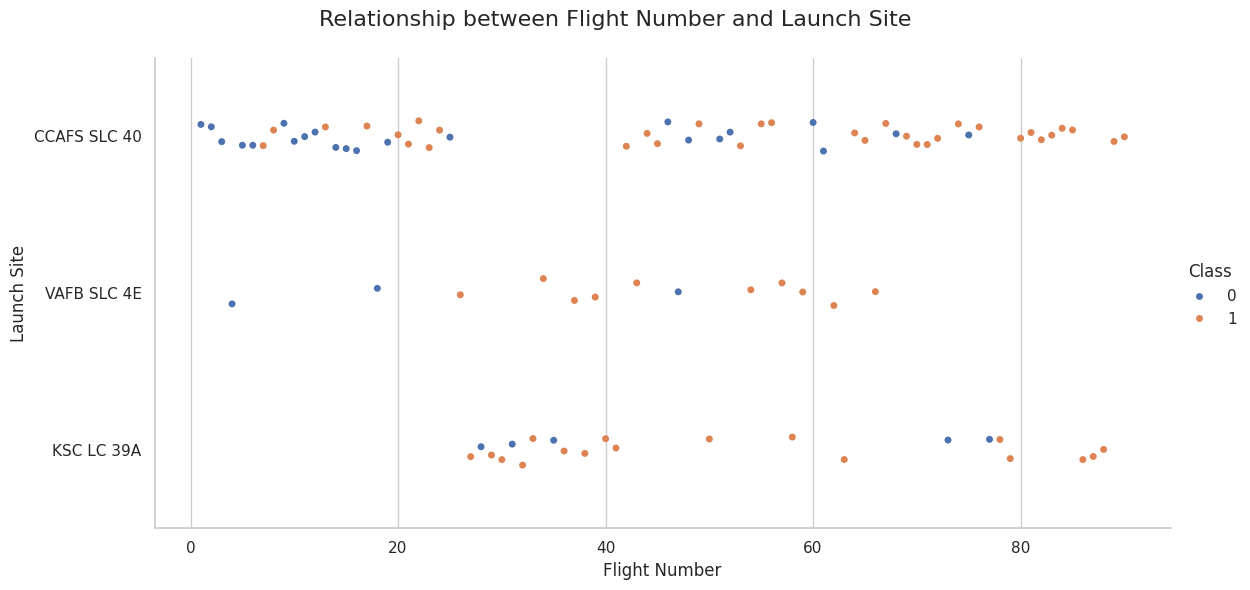

In [7]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
# Step 1: Set the style for the plot
sns.set(style="whitegrid")

# Step 2: Create the catplot
cat_plot = sns.catplot(
    data=df,
    x='FlightNumber',
    y='LaunchSite',
    hue='Class',
    kind='strip',  # You can also use 'swarm' or 'box' depending on your preference
    height=6,
    aspect=2
)

# Step 3: Set titles and labels
cat_plot.set_axis_labels("Flight Number", "Launch Site")
cat_plot.fig.suptitle("Relationship between Flight Number and Launch Site", fontsize=16)
plt.subplots_adjust(top=0.9)  # Adjust the title to fit

# Step 4: Show the plot
plt.show()

The scatter plot shows that CCAFS SLC 40 has been consistently used across a wide range of flight numbers, with an increasing trend of successful outcomes (Class 1) over time. KSC LC 39A appears later in the sequence and shows a higher proportion of successes in higher flight numbers, indicating it may have been used for more recent missions with improved outcomes. VAFB SLC 4E is less frequently used, with fewer data points but still showing a mix of successes and failures. Overall, there is a noticeable improvement in mission success rates as flight numbers increase, particularly at CCAFS SLC 40 and KSC LC 39A.

### TASK 2: Visualize the relationship between Payload Mass and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


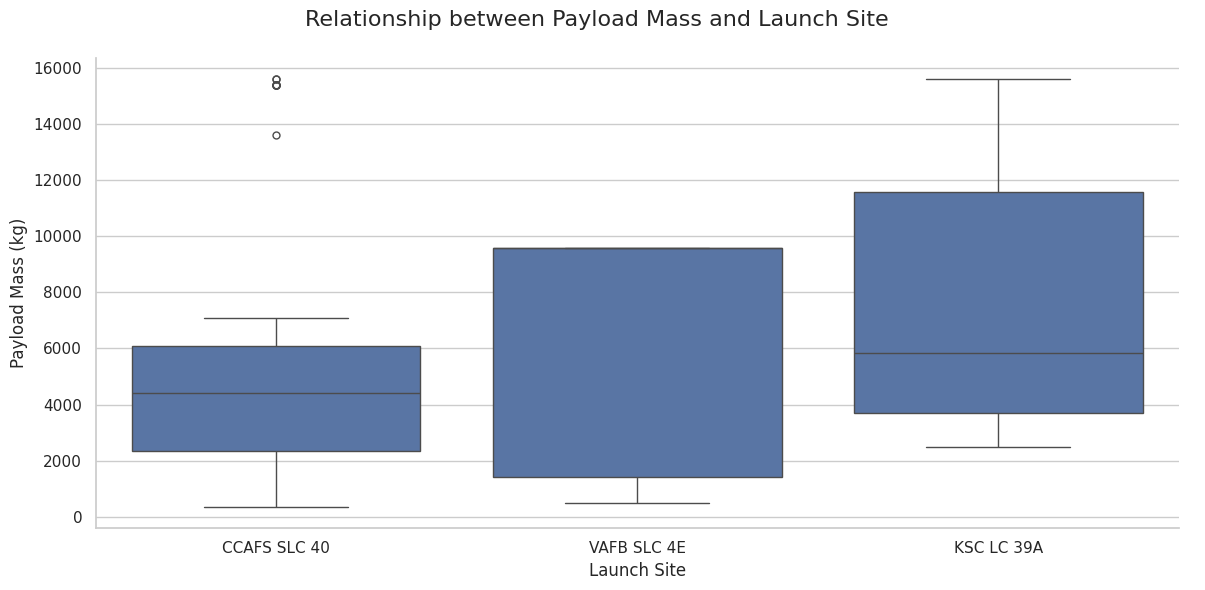

In [8]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
# Step 1: Set the style for the plot
sns.set(style="whitegrid")

# Step 2: Create the catplot
cat_plot = sns.catplot(
    data=df,
    x='LaunchSite',
    y='PayloadMass',
    kind='box',  # You can also use 'strip' or 'violin'
    height=6,
    aspect=2
)

# Step 3: Set titles and labels
cat_plot.set_axis_labels("Launch Site", "Payload Mass (kg)")
cat_plot.fig.suptitle("Relationship between Payload Mass and Launch Site", fontsize=16)
plt.subplots_adjust(top=0.9)  # Adjust the title to fit

# Step 4: Show the plot
plt.show()

The Payload Mass vs. Launch Site box plot shows that for the VAFB SLC 4E launch site, there are no rockets that carried a payload mass greater than 10,000 kg. In contrast, KSC LC 39A has handled higher payloads, with a maximum exceeding 10,000 kg, and even some outliers around 16,000 kg. CCAFS SLC 40 has a moderate range of payload masses, with most payloads below 10,000 kg and a few outliers exceeding this threshold. This indicates that VAFB SLC 4E primarily handles lighter payloads compared to the other launch sites.

In [9]:
# Step 1: Apply one-hot encoding to the specified columns
features_df = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
encoded_df = pd.get_dummies(features_df, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], drop_first=True)

# Step 2: Get the total number of columns in the new DataFrame
total_columns = encoded_df.shape[1]

# Display the total number of columns
print("Total number of columns after one-hot encoding:", total_columns)

Total number of columns after one-hot encoding: 76


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


<ipython-input-10-a666a00dc950>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


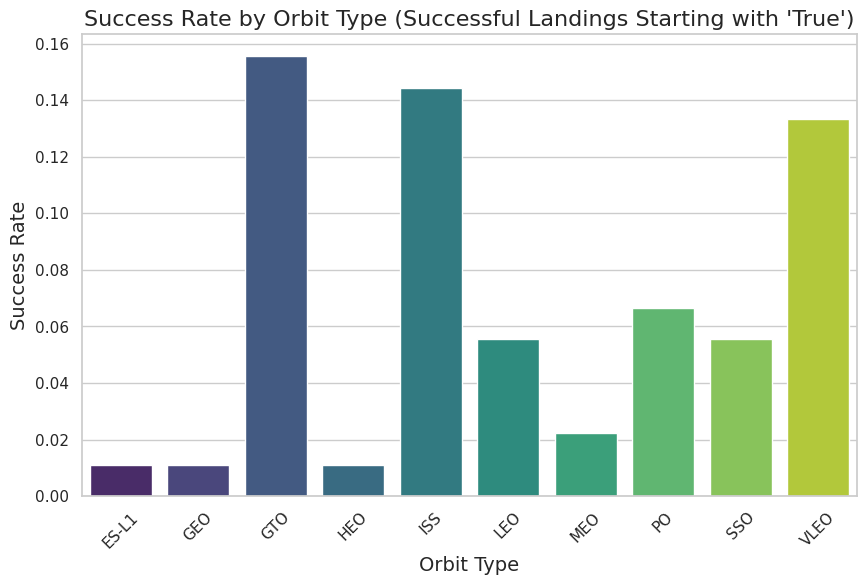

In [10]:
# HINT use groupby method on Orbit column and get the mean of Class column
# Step 1: Filter for successful landings that start with "True"
filtered_df = df[df['Outcome'].str.startswith("True")].groupby('Orbit')

# Step 2: Calculate the success rate for each orbit type
success_counts = filtered_df.size()
total_counts = len(df)

success_rate = (success_counts / total_counts).fillna(0).reset_index(name='SuccessRate')

# Step 3: Set the style for the plot
sns.set(style="whitegrid")

# Step 4: Create the bar chart
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=success_rate,
    x='Orbit',
    y='SuccessRate',
    palette='viridis'
)

# Step 5: Set titles and labels
bar_plot.set_title("Success Rate by Orbit Type (Successful Landings Starting with 'True')", fontsize=16)
bar_plot.set_xlabel("Orbit Type", fontsize=14)
bar_plot.set_ylabel("Success Rate", fontsize=14)
plt.xticks(rotation=45)

# Step 6: Show the plot
plt.show()

The bar chart shows the success rates of different orbit types for successful landings. The GTO (Geostationary Transfer Orbit), ISS (International Space Station orbit), and VLEO (Very Low Earth Orbit) have the highest success rates, with GTO slightly leading. In contrast, other orbits like MEO (Medium Earth Orbit), HEO (Highly Elliptical Orbit), and ES-L1 (Earth-Sun Lagrange Point 1) have significantly lower success rates. This suggests that missions to GTO, ISS, and VLEO have been more reliably successful compared to those targeting other orbit types.

### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


<ipython-input-11-973b8c2a2ba9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  strip_plot = sns.stripplot(


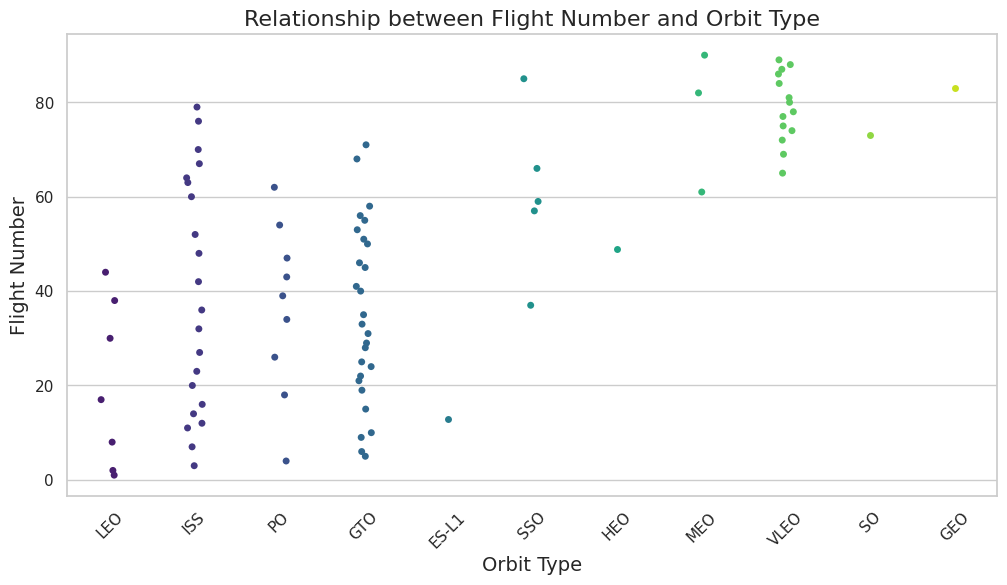

In [11]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
# Step 1: Set the style for the plot
sns.set(style="whitegrid")

# Step 2: Create the strip plot
plt.figure(figsize=(12, 6))
strip_plot = sns.stripplot(
    data=df,
    x='Orbit',
    y='FlightNumber',
    jitter=True,  # Adds jitter to avoid overlap
    palette='viridis'
)

# Step 3: Set titles and labels
strip_plot.set_title("Relationship between Flight Number and Orbit Type", fontsize=16)
strip_plot.set_xlabel("Orbit Type", fontsize=14)
strip_plot.set_ylabel("Flight Number", fontsize=14)
plt.xticks(rotation=45)

# Step 4: Show the plot
plt.show()

success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.


### TASK  5: Visualize the relationship between Payload Mass and Orbit type


Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type


<ipython-input-12-e32a6d91cd91>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  scatter_plot = sns.stripplot(


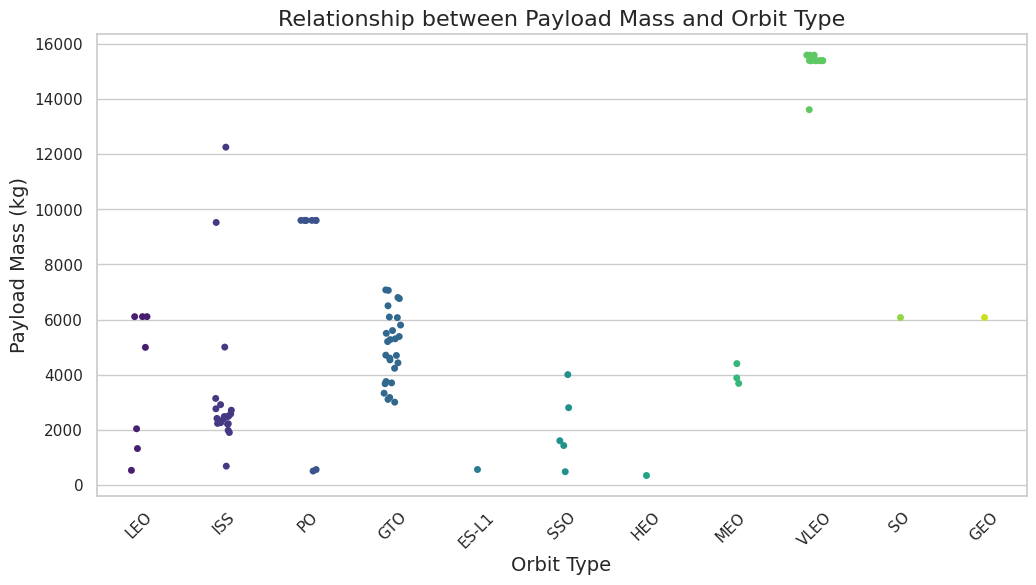

In [12]:
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value
# Step 1: Set the style for the plot
sns.set(style="whitegrid")

# Step 2: Create the scatter plot (using stripplot or swarmplot)
plt.figure(figsize=(12, 6))
scatter_plot = sns.stripplot(
    data=df,
    x='Orbit',
    y='PayloadMass',
    jitter=True,  # Adds jitter to avoid overlap
    palette='viridis'
)

# Alternatively, you could use:
# scatter_plot = sns.swarmplot(data=df, x='Orbit', y='PayloadMass', palette='viridis')

# Step 3: Set titles and labels
scatter_plot.set_title("Relationship between Payload Mass and Orbit Type", fontsize=16)
scatter_plot.set_xlabel("Orbit Type", fontsize=14)
scatter_plot.set_ylabel("Payload Mass (kg)", fontsize=14)
plt.xticks(rotation=45)

# Step 4: Show the plot
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS. However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.


### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [13]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


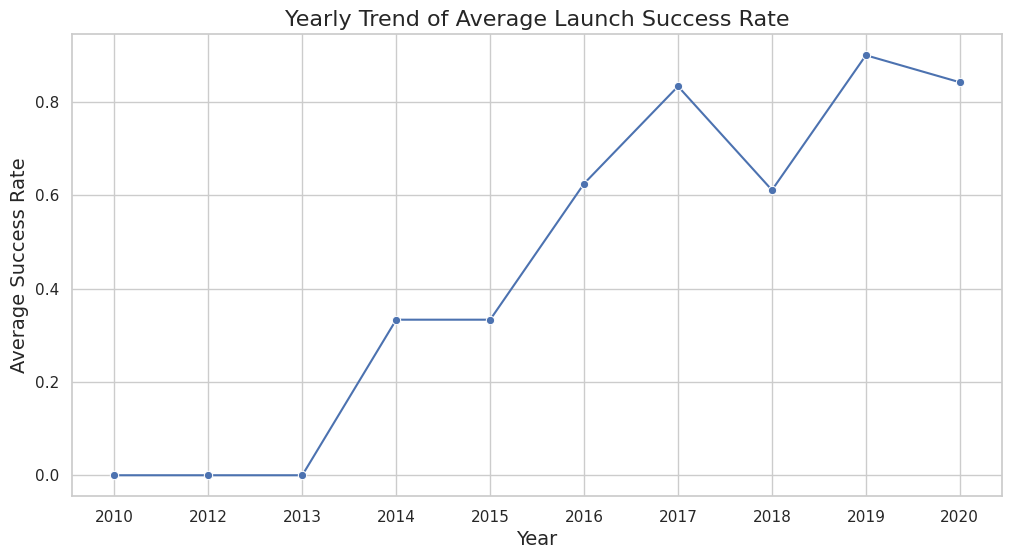

In [15]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
# A function to extract years from the date
def Extract_year():
    return [i.split("-")[0] for i in df["Date"]]  # List comprehension to extract years

# Step 1: Extract years and add to the DataFrame
df['Year'] = Extract_year()

# Step 2: Calculate the success rate for each year
success_counts = df[df['Outcome'].astype(str).str.startswith('True')].groupby('Year').size()
total_counts = df.groupby('Year').size()

success_rate = (success_counts / total_counts).fillna(0).reset_index(name='AverageSuccessRate')

# Step 3: Set the style for the plot
sns.set(style="whitegrid")

# Step 4: Create the line chart
plt.figure(figsize=(12, 6))
line_plot = sns.lineplot(
    data=success_rate,
    x='Year',
    y='AverageSuccessRate',
    marker='o'
)

# Step 5: Set titles and labels
line_plot.set_title("Yearly Trend of Average Launch Success Rate", fontsize=16)
line_plot.set_xlabel("Year", fontsize=14)
line_plot.set_ylabel("Average Success Rate", fontsize=14)

# Step 6: Show the plot
plt.show()

the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [16]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [18]:
# HINT: Use get_dummies() function on the categorical columns
import pandas as pd

# Assuming 'features' is already defined as shown in your question
# Create dummy variables for categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], drop_first=True)


# Step 2: Get the total number of columns in the new DataFrame
total_columns = features_one_hot.shape[1]

# Display the total number of columns
print("Total number of columns after one-hot encoding:", total_columns)

# Display the first few rows of the resulting DataFrame
print(features_one_hot.head())

Total number of columns after one-hot encoding: 76
   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0             1  6104.959412        1     False   False  False    1.0   
1             2   525.000000        1     False   False  False    1.0   
2             3   677.000000        1     False   False  False    1.0   
3             4   500.000000        1     False   False  False    1.0   
4             5  3170.000000        1     False   False  False    1.0   

   ReusedCount  Orbit_GEO  Orbit_GTO  ...  Serial_B1048  Serial_B1049  \
0            0      False      False  ...         False         False   
1            0      False      False  ...         False         False   
2            0      False      False  ...         False         False   
3            0      False      False  ...         False         False   
4            0      False       True  ...         False         False   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058

### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers, cast the entire dataframe to variable type <code>float64</code>


In [19]:
# HINT: use astype function
# Cast all numeric columns to float64
features_one_hot = features_one_hot.astype('float64')

# Display the data types to confirm the change
print(features_one_hot.dtypes)

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 76, dtype: object


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


In [22]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log-->


<!--
| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|
| 2024-07-18        | 1.2     | Anita Verma | Clarified instructions|
-->


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
